In [1]:
from ray.rllib.contrib.alpha_zero.core.alpha_zero_trainer import AlphaZeroTrainer
from ray.rllib.policy.sample_batch import DEFAULT_POLICY_ID
from ray.rllib.policy.policy_map import PolicyMap
from ray.rllib.evaluation.episode import Episode
from ray.rllib.models.catalog import ModelCatalog

from parameters import parameters

ModelCatalog.register_custom_model("model", parameters["model"])

In [2]:
checkpoint_path = "exps/AlphaZero_TicTacToe/contrib_AlphaZero_TicTacToe_8aae7_00000_0_2022-05-11_07-52-31/checkpoint_000040/checkpoint-40"

In [3]:
parameters["config"]["mcts_config"]["num_simulations"] = 50
parameters["config"]["mcts_config"]["argmax_tree_policy"] = True
parameters["config"]["mcts_config"]["add_dirichlet_noise"] = False
parameters["config"]["mcts_config"]["temperature"] = 1

In [4]:
agent = AlphaZeroTrainer(env=parameters["env"], config=parameters["config"])
agent.restore(checkpoint_path)
policy = agent.get_policy()

env = parameters["env"]()

2022-05-13 12:19:30,696	WARNING deprecation.py:46 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
(RolloutWorker pid=19217) 2022-05-13 12:19:35,691	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
(RolloutWorker pid=19217) 2022-05-13 12:19:35,691	WARNING env.py:120 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
2022-05-13 12:19:35,780	WARNING util.py:60 -- Install gputil for GPU system monitor

(RolloutWorker pid=19219) 2022-05-13 12:19:35,779	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
(RolloutWorker pid=19219) 2022-05-13 12:19:35,779	WARNING env.py:120 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.


0


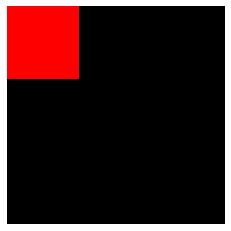

4


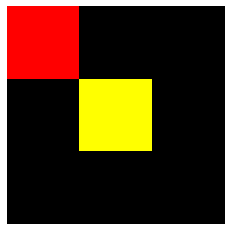

1


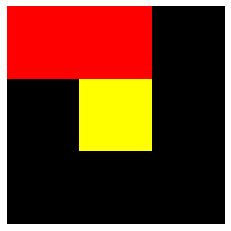

2


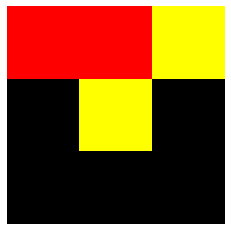

6


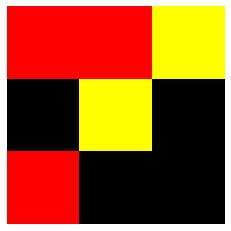

3


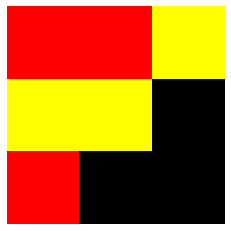

5


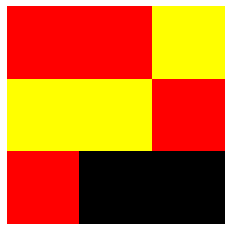

8


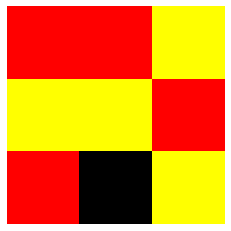

7


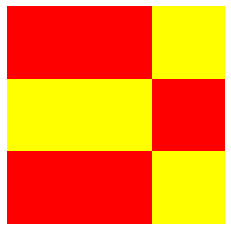

In [5]:
obs = env.reset()

episode = Episode(
    PolicyMap(0,0),
    lambda _, __: DEFAULT_POLICY_ID,
    lambda: None,
    lambda _: None,
    0,
)

episode.user_data['initial_state'] = env.get_state()

done = False
while not done:
  action, _, _ = policy.compute_single_action(obs, episode=episode)
  print(action)
  obs, reward, done, _ = env.step(action)
  env.render()
  episode.length += 1

In [6]:
import torch

obs = env.reset()
""" env.step(0)
env.step(1)
env.step(2)
env.step(3)
env.step(5)
env.step(8)
env.step(6)
env.step(4)
env.step(7) """
obs["obs"] = torch.from_numpy(obs["obs"]).float()

policy.model.forward(obs, None, None)[0], policy.model.value_function()

(tensor([ 0.4550, -0.1452,  0.2523,  0.1217, -0.8263,  0.0266,  0.1429, -0.0107,
          0.2802], grad_fn=<AddBackward0>),
 tensor([0.0479], grad_fn=<AddBackward0>))